In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data = pd.DataFrame({
    'Age': np.random.randint(18, 60, 100),
    'Monthly_Data_Usage_GB': np.random.uniform(1, 50, 100),
    'Avg_Screen_Time_hr': np.random.uniform(1, 10, 100),
    'App_Downloads_per_Month': np.random.randint(0, 20, 100),
    'Monthly_Spending': np.random.uniform(100, 2000, 100)
})

In [51]:
data.head(5)

,Age,Monthly_Data_Usage_GB,Avg_Screen_Time_hr,App_Downloads_per_Month,Monthly_Spending
0,19,49.911068,9.156296,9,1951.498474
1,37,34.776269,8.196614,1,1412.749567
2,46,17.850644,7.056207,12,1704.109695
3,49,47.802113,8.068611,15,1113.921673
4,24,48.245868,2.065742,17,1843.860182


In [52]:
data.isnull().sum()

,0
Age,0
Monthly_Data_Usage_GB,0
Avg_Screen_Time_hr,0
App_Downloads_per_Month,0
Monthly_Spending,0


In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc = StandardScaler()

In [55]:
scaled_data = sc.fit_transform(data)

In [56]:
# Use Elbow Method to find the best number of clusters

In [57]:
from sklearn.cluster import KMeans

In [58]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

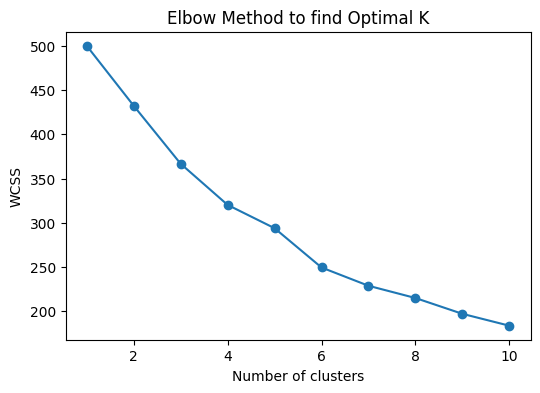

In [59]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to find Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [60]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Segment'] = kmeans.fit_predict(scaled_data)

In [61]:
print("\n✅ Clustering complete. Users are divided into segments:")
print(data.head())


✅ Clustering complete. Users are divided into segments:
   Age  Monthly_Data_Usage_GB  Avg_Screen_Time_hr  App_Downloads_per_Month  \
0   19              49.911068            9.156296                        9   
1   37              34.776269            8.196614                        1   
2   46              17.850644            7.056207                       12   
3   49              47.802113            8.068611                       15   
4   24              48.245868            2.065742                       17   

   Monthly_Spending  Segment  
0       1951.498474        1  
1       1412.749567        1  
2       1704.109695        0  
3       1113.921673        1  
4       1843.860182        2  


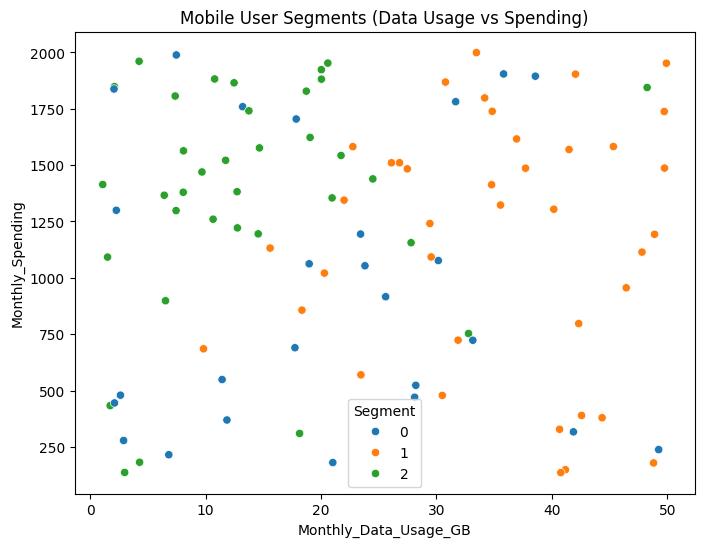

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=data['Monthly_Data_Usage_GB'],
    y=data['Monthly_Spending'],
    hue=data['Segment'],
    palette='tab10'
)
plt.title('Mobile User Segments (Data Usage vs Spending)')
plt.show()

In [63]:
print("\n📊 Average values per segment:")
print(data.groupby('Segment').mean())


📊 Average values per segment:
               Age  Monthly_Data_Usage_GB  Avg_Screen_Time_hr  \
Segment                                                         
0        42.846154              20.305665            7.919465   
1        43.102564              35.239712            5.769370   
2        30.685714              13.665001            3.734887   

         App_Downloads_per_Month  Monthly_Spending  
Segment                                             
0                      14.423077        959.508153  
1                       6.333333       1169.805278  
2                      10.142857       1373.996061  


In [64]:
segment_summary = data.groupby('Segment').mean()


In [65]:
for i in range(len(segment_summary)):
    print(f"\nSegment {i} Summary:")
    if segment_summary['Monthly_Spending'][i] > 2000:
        print("💰 High spender & heavy data user – Premium users.")
    elif segment_summary['Monthly_Data_Usage_GB'][i] < 10:
        print("📱 Light user – minimal app use and low spending.")
    else:
        print("🎯 Moderate user – balanced data usage and spending.")


Segment 0 Summary:
🎯 Moderate user – balanced data usage and spending.

Segment 1 Summary:
🎯 Moderate user – balanced data usage and spending.

Segment 2 Summary:
🎯 Moderate user – balanced data usage and spending.
